In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from math import sqrt

df_train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv", index_col="Id")
df_test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv", index_col="Id")

df_train.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = df_train.SalePrice
df_train.drop(['SalePrice'], axis=1, inplace=True)

df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal


In [2]:
df_train.shape

(1460, 79)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train, y,train_size=0.8, test_size=0.2, random_state=0)

missing_values = X_train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percentage = (missing_values / len(X_train)) * 100

columns_to_drop = missing_percentage[missing_percentage > 30].index
X_train.drop(columns=columns_to_drop, inplace=True)

columns_to_fill = missing_percentage[missing_percentage < 30].index
for column in columns_to_fill:
    if X_train[column].dtype == "float64" or X_train[column].dtype == "int64":
        X_train[column].fillna(X_train[column].mean(), inplace=True)
    else:
        X_train[column].fillna(X_train[column].mode()[0], inplace=True)
        
X_train.isnull().sum().sum()

0

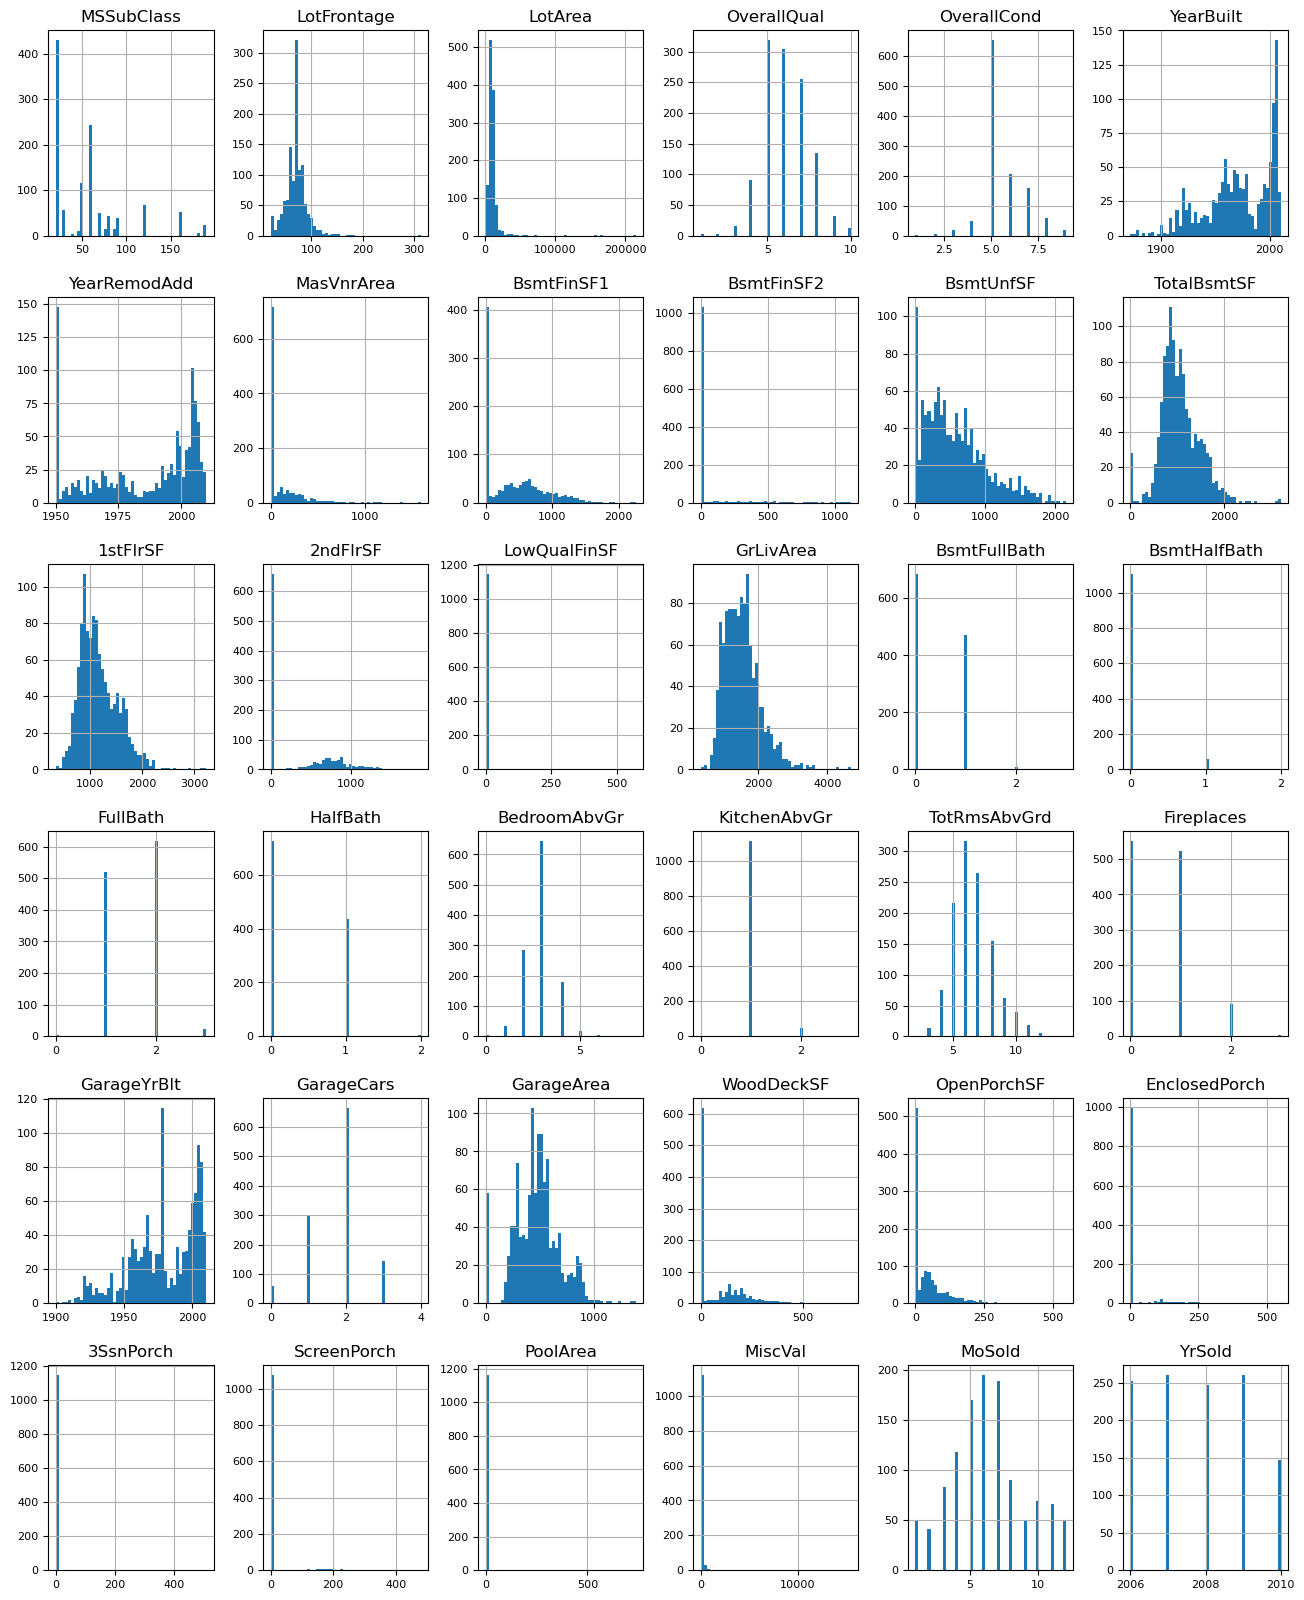

In [5]:
numerical_data = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
categorical_data = [col for col in X_train.columns if X_train[col].dtype == "object"]

X_train[numerical_data].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [6]:
X_train.drop(columns=['LowQualFinSF'], inplace=True)
X_train.drop(columns=['BsmtHalfBath'], inplace=True)
X_train.drop(columns=['KitchenAbvGr'], inplace=True)
X_train.drop(columns=['EnclosedPorch'], inplace=True)
X_train.drop(columns=['3SsnPorch'], inplace=True)
X_train.drop(columns=['ScreenPorch'], inplace=True)
X_train.drop(columns=['PoolArea'], inplace=True)
X_train.drop(columns=['MiscVal'], inplace=True)
X_train.drop(columns=['MoSold'], inplace=True)
X_train.drop(columns=['YrSold'], inplace=True)
X_train.drop(columns=['MSSubClass'], inplace=True)
X_train.drop(columns=['OverallCond'], inplace=True)
X_train.drop(columns=['BsmtFinSF2'], inplace=True)

In [7]:
numerical_data = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_data = X_train.select_dtypes(exclude=np.number).columns.tolist()

In [8]:

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_data),
        ('cat', categorical_transformer, categorical_data)
    ]
)

# Define model
model = RandomForestRegressor(n_estimators=100, criterion="squared_error",random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print('MAE: ', mean_absolute_error(y_valid, preds))
print('RMSE:', sqrt(mean_squared_error(y_valid, preds)))
print(r2_score(y_valid, preds))

MAE:  17826.523047945208
RMSE: 33406.084060177905
0.838402737092089


In [9]:
test_preprocessed = preprocessor.transform(df_test)
predictions = model.predict(test_preprocessed)

In [10]:
test_preprocessed = preprocessor.transform(df_test)
predictions = model.predict(test_preprocessed)
predictions_df = pd.DataFrame({
    'Id': id, 
    'SalePrice': predictions
})
predictions_df.to_csv('predicted_prices.csv', index=False)

In [11]:
submission= pd.DataFrame(data = {'Id': range(1461,2920),
                                'SalePrice': predictions})
submission

,Id,SalePrice
0,1461,125515.91
1,1462,154462.00
2,1463,185234.26
3,1464,183781.00
4,1465,203585.85
...,...,...
1454,2915,87062.00
1455,2916,87294.00
1456,2917,147230.87
1457,2918,114015.50
